AUTHORS: DAVID LAESSKER - PETER FAGRELL

In [59]:
# Imports

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import random
import numpy as np
np.random.seed(0)
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
import os.path
tensorboard_callback = keras.callbacks.TensorBoard(log_dir='logs')

Loading images...

In [51]:
data_gen = ImageDataGenerator(rescale=1.0/255)
img_size = 64
batch_size = 32

def data_generator(dir):
    generator = data_gen.flow_from_directory(
        dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)
    return generator

train_generator = data_generator('train')
val_generator = data_generator('validation')

Found 1600 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


Create train generator

In [52]:
Xbatch, Ybatch = train_generator.next()

Show random image in the training data

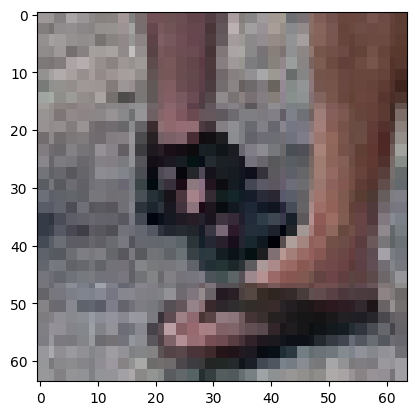

In [53]:
plt.imshow(Xbatch[random.randint(0, batch_size-1)])

Make convolutional net function :)

In [54]:
def make_convnet(img_width=64, img_height=64, channels=3):
    """
    Creates a convolutional neural network with the specified input shape.
    For binary classification.
    """
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                    activation='relu',
                    input_shape=(img_width, img_height, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
    return model

Make function for displaying history :)

In [55]:
def display_history(history):
    fig = plt.figure()
    plt.plot(history.history['loss'], color='teal', label='loss')
    plt.plot(history.history['val_loss'], color='orange', label='val_loss')
    fig.suptitle('Loss', fontsize=20)
    plt.legend(loc="upper left")
    plt.show()

    fig = plt.figure()
    plt.plot(history.history['accuracy'], color='teal', label='accuracy')
    plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
    fig.suptitle('Accuracy', fontsize=20)
    plt.legend(loc="upper left")
    plt.show()

Mini funct to make code below look better

In [60]:
def model_exists(): return os.path.isfile('model/model.h5')

We use the function to create our model with the specified img_size

In [56]:
img_size = 64 # img size, increase for accruacy, decrease for performance
batch_size = 16 # batch size, increase for accruacy, decrease for performance
epochs = 10 # number of epochs to train for
model = make_convnet(img_width=img_size, img_height=img_size) # Create the model

Fit model and save... this may take time depending on computer params above

If there already is a model it will be loaded

If you want to train a new model remove or rename old 'model.h5' file in model folder

In [57]:
if model_exists():
    hist = model.fit(train_generator, 
        epochs=epochs,
        validation_data=val_generator,
        batch_size=batch_size,
        callbacks=[tensorboard_callback])
    model.save('model/model.h5')
    np.save('model/history1.npy', hist.history)
else:
    model = keras.models.load_model('model.h5')
    hist = np.load('model/history1.npy', allow_pickle='TRUE').item()

Epoch 1/10
50/50 [==============================] - 12s 215ms/step - loss: 0.6736 - accuracy: 0.5894 - val_loss: 0.6018 - val_accuracy: 0.6719
Epoch 2/10
50/50 [==============================] - 11s 221ms/step - loss: 0.5897 - accuracy: 0.7113 - val_loss: 0.5995 - val_accuracy: 0.6753
Epoch 3/10
50/50 [==============================] - 13s 256ms/step - loss: 0.5215 - accuracy: 0.7394 - val_loss: 0.5587 - val_accuracy: 0.7465
Epoch 4/10
50/50 [==============================] - 11s 226ms/step - loss: 0.4646 - accuracy: 0.7844 - val_loss: 0.5765 - val_accuracy: 0.7257
Epoch 5/10
50/50 [==============================] - 11s 218ms/step - loss: 0.4054 - accuracy: 0.8213 - val_loss: 0.5092 - val_accuracy: 0.7708
Epoch 6/10
50/50 [==============================] - 10s 203ms/step - loss: 0.3475 - accuracy: 0.8394 - val_loss: 0.5204 - val_accuracy: 0.7882
Epoch 7/10
50/50 [==============================] - 11s 224ms/step - loss: 0.2929 - accuracy: 0.8769 - val_loss: 0.5075 - val_accuracy: 0.7934

Plot history

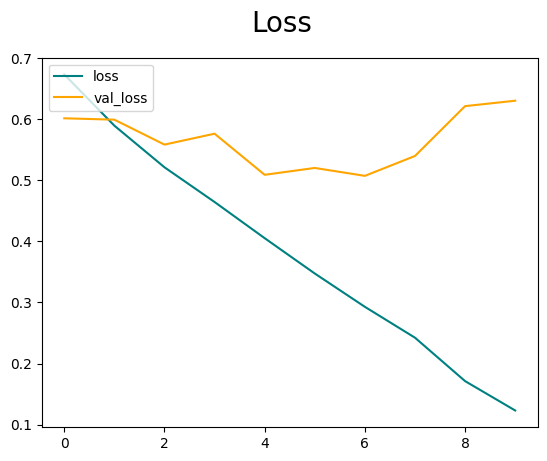

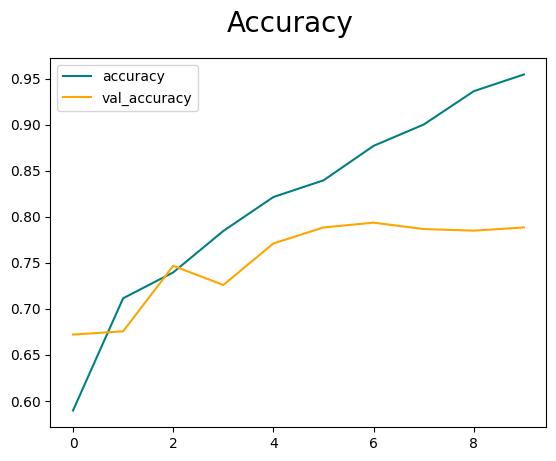

In [58]:
display_history(hist)